In [ ]:
#Install libraries
!pip3 install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633720 sha256=99615e7b213da0c6989166c6f13b5a48d200a87e66199a465defa3f069822267
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://drive.google.com/file/d/1E4y0a2A0PvWbAVvyd8QVuExC_0APpDnp/view?usp=sharing

!gdown 1E4y0a2A0PvWbAVvyd8QVuExC_0APpDnp

Downloading...
From: https://drive.google.com/uc?id=1E4y0a2A0PvWbAVvyd8QVuExC_0APpDnp
To: /content/ratings.txt
100% 376k/376k [00:00<00:00, 103MB/s]


In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import CoClustering

from surprise import accuracy
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('ratings.txt', header=None, sep=" ", names=["user_id", "movie_id", "rating"])

In [ ]:
df.head(10)

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
5,1,6,3.5
6,1,7,3.5
7,1,8,3.0
8,1,9,2.5
9,1,10,4.0


In [ ]:
#Dimensionality
min_ratings = 5
filter_items = df['movie_id'].value_counts() > min_ratings
filter_items = filter_items[filter_items].index.tolist()

min_user_ratings = 5
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['movie_id'].isin(filter_items)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(35497, 3)
The new data frame shape:	(31115, 3)


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_new[['user_id', 'movie_id', 'rating']], reader)
trainset = data.build_full_trainset()

In [ ]:
benchmark_cv5 = []
benchmark_cv10 = []
benchmark_cv15 = []

algorithms = [
      KNNBasic(k=21, sim_options={'name': 'cosine'}),
      KNNBaseline(k=21, sim_options={'name': 'cosine'}), 
      KNNWithMeans(k=21, sim_options={'name': 'cosine'}), 
      SVD(n_factors=100, n_epochs=20, init_std_dev=0.01, lr_all=0.007, reg_all=0.02), 
      SVDpp(n_factors=20, n_epochs=20, init_std_dev=0.01, lr_all=0.005, reg_all=0.02), 
      CoClustering(n_cltr_u=3, n_cltr_i=4, n_epochs=20)
]

for algorithm in algorithms:
    # Perform cross validation
    # results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    results_cv5 = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=5, verbose=False)
    results_cv10 = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=10, verbose=False)
    results_cv15 = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=15, verbose=False)
    
    # Get results & append algorithm name
    tmp_cv5 = pd.DataFrame.from_dict(results_cv5).mean(axis=0)
    tmp_cv5 = tmp_cv5.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark_cv5.append(tmp_cv5)

    tmp_cv10 = pd.DataFrame.from_dict(results_cv10).mean(axis=0)
    tmp_cv10 = tmp_cv10.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark_cv10.append(tmp_cv10)

    tmp_cv15 = pd.DataFrame.from_dict(results_cv15).mean(axis=0)
    tmp_cv15 = tmp_cv15.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark_cv15.append(tmp_cv15)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
surprise_results_cv5 = pd.DataFrame(benchmark_cv5).set_index('Algorithm').sort_values('test_rmse')
surprise_results_cv10 = pd.DataFrame(benchmark_cv10).set_index('Algorithm').sort_values('test_rmse')
surprise_results_cv15 = pd.DataFrame(benchmark_cv15).set_index('Algorithm').sort_values('test_rmse')
print(surprise_results_cv5)
print('-'*55)
print(surprise_results_cv10)
print('-'*55)
print(surprise_results_cv15)

              test_rmse  test_mae   fit_time  test_time
Algorithm                                              
SVD            0.772788  0.597799   1.465486   0.043591
SVDpp          0.774011  0.600085  11.783977   0.379868
KNNWithMeans   0.792919  0.613103   1.091803   2.082556
KNNBaseline    0.797585  0.615802   1.110289   2.414707
CoClustering   0.834980  0.653708   0.684019   0.047970
KNNBasic       0.907203  0.694140   2.155794   5.222050
-------------------------------------------------------
              test_rmse  test_mae   fit_time  test_time
Algorithm                                              
SVD            0.769476  0.594895   1.648952   0.024092
SVDpp          0.772978  0.598695  14.434306   0.186059
KNNWithMeans   0.787718  0.608977   1.214714   1.161105
KNNBaseline    0.789926  0.609236   1.242701   1.218599
CoClustering   0.826295  0.648380   0.758847   0.014125
KNNBasic       0.909832  0.693663   1.155266   1.166826
------------------------------------------------

In [ ]:
# smaller grid for testing
param_grid = {
     "n_epochs": [10, 20],
     "lr_all": [0.002, 0.005],
     "reg_all": [0.02]
 }
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], refit=True, cv=5)

gs.fit(data)

training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])
print("BEST MAE: \t", gs.best_score["mae"])
print("BEST params: \t", gs.best_params["rmse"])

BEST RMSE: 	 0.7756512117672502
BEST MAE: 	 0.6027704551303146
BEST params: 	 {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


In [ ]:
from datetime import datetime
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_new[['user_id', 'movie_id', 'rating']], reader)
trainset = data.build_full_trainset()

startTraining = datetime.now()

algo = SVD(n_epochs = training_parameters['n_epochs'], lr_all = training_parameters['lr_all'], reg_all = training_parameters['reg_all'])
algo.fit(trainset)

endTraining = datetime.now()
print("Training Time: ", (endTraining-startTraining).seconds, "seconds")

Training Time:  1 seconds


In [ ]:
from surprise import dump
ggdrive_path = '/content/drive/MyDrive/'
file_name = ggdrive_path +'model_svd.pickle'
dump.dump(file_name, algo=algo)

In [ ]:
_, loaded_model = dump.load(file_name)
prediction = loaded_model.predict(9, 167, verbose=True)
print(prediction)

user: 9          item: 167        r_ui = None   est = 3.28   {'was_impossible': False}
user: 9          item: 167        r_ui = None   est = 3.28   {'was_impossible': False}


In [ ]:
#EVALUATION
df_cv5 = pd.DataFrame(benchmark_cv5)
df_cv5['cv'] = 'CV5'

df_cv10 = pd.DataFrame(benchmark_cv10)
df_cv10['cv'] = 'CV10'

df_cv15 = pd.DataFrame(benchmark_cv15)
df_cv15['cv'] = 'CV15'

frames = [df_cv5, df_cv10, df_cv15]
combined = pd.concat(frames)
combined

,test_rmse,test_mae,fit_time,test_time,Algorithm,cv
0,0.907203,0.694140,2.155794,5.222050,KNNBasic,CV5
1,0.797585,0.615802,1.110289,2.414707,KNNBaseline,CV5
2,0.792919,0.613103,1.091803,2.082556,KNNWithMeans,CV5
3,0.772788,0.597799,1.465486,0.043591,SVD,CV5
4,0.774011,0.600085,11.783977,0.379868,SVDpp,CV5
5,0.834980,0.653708,0.684019,0.047970,CoClustering,CV5
0,0.909832,0.693663,1.155266,1.166826,KNNBasic,CV10
1,0.789926,0.609236,1.242701,1.218599,KNNBaseline,CV10
2,0.787718,0.608977,1.214714,1.161105,KNNWithMeans,CV10
3,0.769476,0.594895,1.648952,0.024092,SVD,CV10


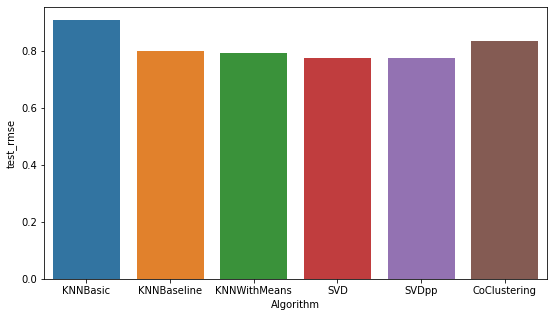

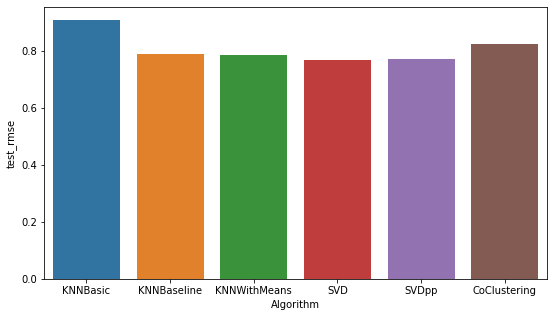

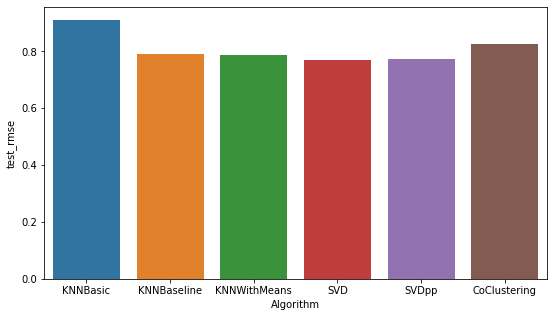

In [ ]:
figsize=(9, 5)
plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_rmse',
            data = pd.DataFrame(benchmark_cv5))
plt.show()

plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_rmse',
            data = pd.DataFrame(benchmark_cv10))
plt.show()

plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_rmse',
            data = pd.DataFrame(benchmark_cv15))
plt.show()

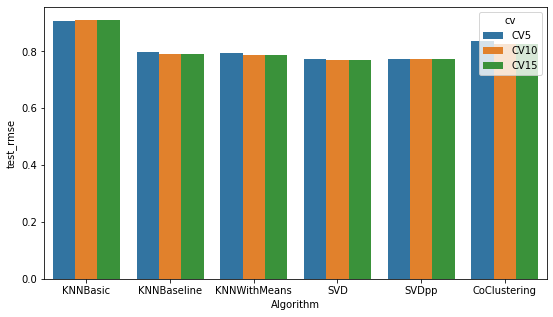

In [ ]:
figsize=(9, 5)
plt.subplots(figsize=figsize)
sns.barplot(x="Algorithm", y="test_rmse", hue ='cv' ,data=combined)
plt.show()

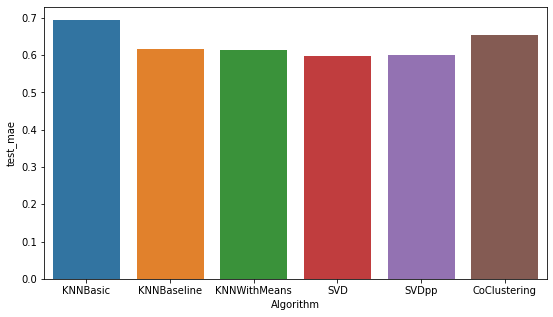

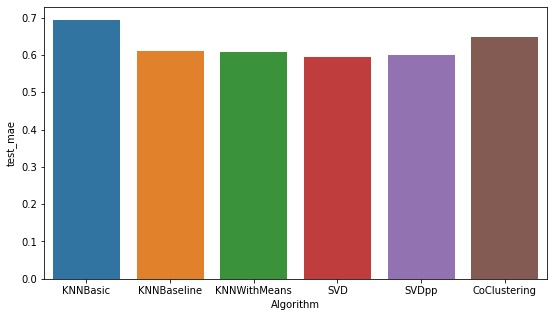

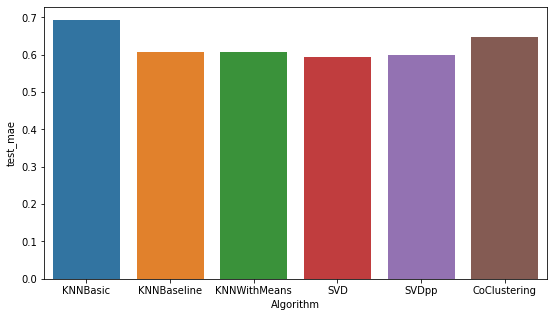

In [ ]:
figsize=(9, 5)
plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_mae',
            data = pd.DataFrame(benchmark_cv5))
plt.show()

plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_mae',
            data = pd.DataFrame(benchmark_cv10))
plt.show()

plt.subplots(figsize=figsize)
sns.barplot(x = 'Algorithm',
            y = 'test_mae',
            data = pd.DataFrame(benchmark_cv15))
plt.show()

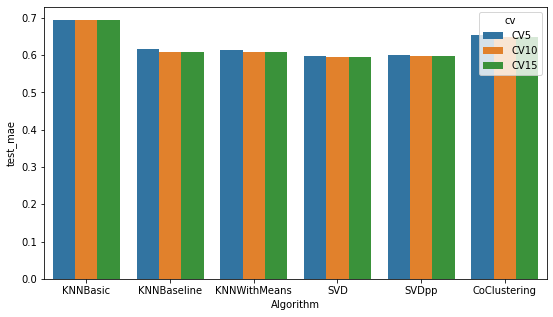

In [ ]:
figsize=(9, 5)
plt.subplots(figsize=figsize)
sns.barplot(x="Algorithm", y="test_mae", hue ='cv' ,data=combined)
plt.show()